<a href="https://colab.research.google.com/github/Gabriel-Kraemer/Gabriel-Kraemer/blob/main/Practico1_RedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 1s 0us/step
El tamaño de datos de entrnamiento es: (60000, 28, 28)


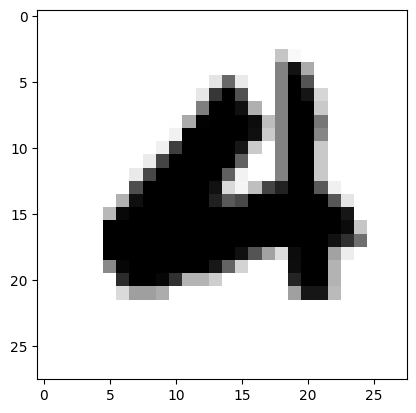

Epoch 1/7
469/469 [==============================] - 3s 5ms/step - loss: 1.6968 - accuracy: 0.5651
Epoch 2/7
469/469 [==============================] - 2s 5ms/step - loss: 0.8717 - accuracy: 0.8053
Epoch 3/7
469/469 [==============================] - 3s 6ms/step - loss: 0.5263 - accuracy: 0.8770
Epoch 4/7
469/469 [==============================] - 2s 4ms/step - loss: 0.3947 - accuracy: 0.8990
Epoch 5/7
469/469 [==============================] - 2s 4ms/step - loss: 0.3302 - accuracy: 0.9115
Epoch 6/7
469/469 [==============================] - 2s 5ms/step - loss: 0.2907 - accuracy: 0.9206
Epoch 7/7
313/313 [==============================] - 1s 3ms/step - loss: 0.2510 - accuracy: 0.9285
test_acc: 0.9284999966621399


In [1]:
from keras import models
from keras import layers
from keras.datasets import mnist
#Cargamos los datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#Examinamos la cantidad de datos que tenemos en cada subgrupo
print(f'El tamaño de datos de entrnamiento es: {train_images.shape}')

digit= train_images[1030]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#Inicializamos los parametros de la red neuronal
network = models.Sequential()
network.add(layers.Dense(20, activation='sigmoid', input_shape=(28*28,)))
network.add(layers.Dense(15, activation='sigmoid'))
network.add(layers.Dense(10, activation='sigmoid'))
network.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

train_images.shape


#Ajustando los datos de salida
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_labels.shape
network.fit(train_images, train_labels, epochs=7, batch_size=128)
test_loss,test_acc = network.evaluate(test_images, test_labels)
print('test_acc:',test_acc)